<a href="https://colab.research.google.com/github/Karthik-HU-Karthi/first-repo/blob/main/Personal_Finance_Tracker_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Personal Finance Tracker

### Load and Explore the Data

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/personal_finance.csv")

# Preview the data
print(df.head())


         Date        Description   Category  Amount     Type
0  2025-01-05             Salary     Income    3000   Income
1  2025-01-10            Grocery       Food    -150  Expense
2  2025-01-15   Electricity Bill  Utilities     -80  Expense
3  2025-01-18         Restaurant       Food     -60  Expense
4  2025-01-22  Freelance Project     Income     800   Income


### Convert Date and Add Month Column

In [2]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Month' column
df['Month'] = df['Date'].dt.to_period('M')

print(df[['Date', 'Month']])


         Date    Month
0  2025-01-05  2025-01
1  2025-01-10  2025-01
2  2025-01-15  2025-01
3  2025-01-18  2025-01
4  2025-01-22  2025-01
5  2025-01-25  2025-01
6  2025-01-30  2025-01
7  2025-02-03  2025-02
8  2025-02-07  2025-02
9  2025-02-12  2025-02
10 2025-02-16  2025-02
11 2025-02-20  2025-02
12 2025-02-28  2025-02


###  Analyze Income and Expenses

In [3]:
# Total Income and Expenses
total_income = df[df['Type'] == 'Income']['Amount'].sum()
total_expenses = df[df['Type'] == 'Expense']['Amount'].sum()

print(f"Total Income: ${total_income}")
print(f"Total Expenses: ${abs(total_expenses)}")


Total Income: $7650
Total Expenses: $610


### Monthly Summary

In [4]:
# Monthly summary grouped by Type
monthly_summary = df.groupby(['Month', 'Type'])['Amount'].sum().unstack().fillna(0)

# Add Net Savings
monthly_summary['Net Savings'] = monthly_summary['Income'] + monthly_summary['Expense']

print(monthly_summary)


Type     Expense  Income  Net Savings
Month                                
2025-01     -355    3800         3445
2025-02     -255    3850         3595


### Category-wise Expenses

In [5]:
# Only expense categories
category_expense = df[df['Type'] == 'Expense'].groupby('Category')['Amount'].sum().abs()

print(category_expense)


Category
Entertainment     40
Food             370
Transport         50
Utilities        150
Name: Amount, dtype: int64


### Visualizations (Optional but Powerful)

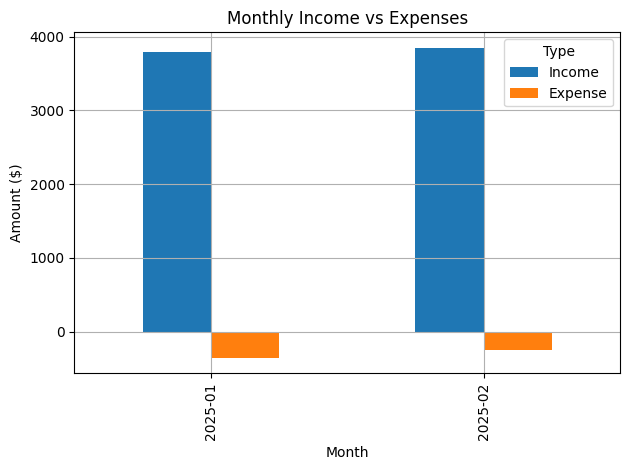

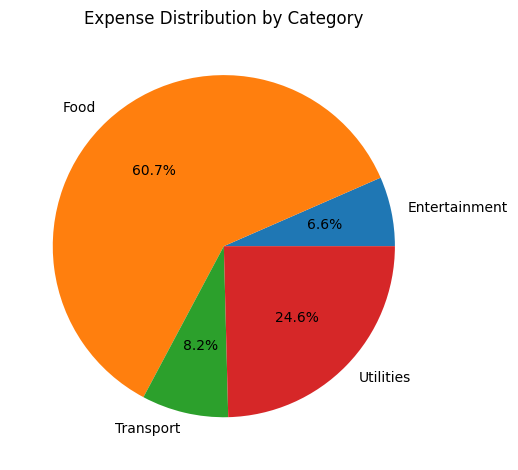

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of income vs expense
monthly_summary[['Income', 'Expense']].plot(kind='bar')
plt.title("Monthly Income vs Expenses")
plt.ylabel("Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pie chart of expenses by category
category_expense.plot(kind='pie', autopct='%1.1f%%')
plt.title("Expense Distribution by Category")
plt.ylabel('')
plt.tight_layout()
plt.show()
